In [122]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [123]:
df  = pd.read_csv('DataBase.csv')
bkp = df
df.head()

,time,data,butter,laplace,gaussian,target
0,0.00,4034.0,4031.067104,5.012830,4043.200379,3629.675004
1,0.03,4034.0,4031.155260,24.472450,4043.194593,3631.690912
2,0.06,4034.0,4031.240059,61.661509,4043.182411,3635.476439
3,0.09,4045.0,4031.321277,114.404215,4043.162852,3640.813728
4,0.12,4045.0,4031.398696,180.707141,4043.134650,3647.503136


# ADICIONANDO OS FILTROS

In [124]:
def getStates(df, key, var='y', n=10):
    table = df.copy() 
    table[f'{var}[n-0]'] = table[key]

    for i in range(1, n):
        table[f'{var}[n-{i}]'] = table[key].shift(i)

    table.fillna(0, inplace=True)
    columns = [f'{var}[n-0]'] + [f'{var}[n-{i}]' for i in range(1, n)]
    return table[columns]

size = 3

In [125]:
xButter = getStates(df, 'butter', 'b', size)
xButter.head()

,b[n-0],b[n-1],b[n-2]
0,4031.067104,0.000000,0.000000
1,4031.155260,4031.067104,0.000000
2,4031.240059,4031.155260,4031.067104
3,4031.321277,4031.240059,4031.155260
4,4031.398696,4031.321277,4031.240059


In [126]:
xLaplace = getStates(df, 'laplace', 'l', size)
xLaplace.head()

,l[n-0],l[n-1],l[n-2]
0,5.012830,0.000000,0.000000
1,24.472450,5.012830,0.000000
2,61.661509,24.472450,5.012830
3,114.404215,61.661509,24.472450
4,180.707141,114.404215,61.661509


In [127]:
xGaussian = getStates(df, 'gaussian', 'g', size)
xGaussian.head()

,g[n-0],g[n-1],g[n-2]
0,4043.200379,0.000000,0.000000
1,4043.194593,4043.200379,0.000000
2,4043.182411,4043.194593,4043.200379
3,4043.162852,4043.182411,4043.194593
4,4043.134650,4043.162852,4043.182411


In [128]:
df = pd.concat([df.time, xButter, xLaplace, xGaussian, df.target, df.data], axis=1)
df

,time,b[n-0],b[n-1],b[n-2],l[n-0],l[n-1],l[n-2],g[n-0],g[n-1],g[n-2],target,data
0,0.00,4031.067104,0.000000,0.000000,5.012830,0.000000,0.000000,4043.200379,0.000000,0.000000,3629.675004,4034.0
1,0.03,4031.155260,4031.067104,0.000000,24.472450,5.012830,0.000000,4043.194593,4043.200379,0.000000,3631.690912,4034.0
2,0.06,4031.240059,4031.155260,4031.067104,61.661509,24.472450,5.012830,4043.182411,4043.194593,4043.200379,3635.476439,4034.0
3,0.09,4031.321277,4031.240059,4031.155260,114.404215,61.661509,24.472450,4043.162852,4043.182411,4043.194593,3640.813728,4045.0
4,0.12,4031.398696,4031.321277,4031.240059,180.707141,114.404215,61.661509,4043.134650,4043.162852,4043.182411,3647.503136,4045.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3636,109.08,4094.975427,4094.975053,4094.974622,4095.006398,4095.006836,4095.007291,4095.000000,4095.000000,4095.000000,4094.980982,4095.0
3637,109.11,4094.975749,4094.975427,4094.975053,4095.005978,4095.006398,4095.006836,4095.000000,4095.000000,4095.000000,4094.981197,4095.0
3638,109.14,4094.976022,4094.975749,4094.975427,4095.005576,4095.005978,4095.006398,4095.000000,4095.000000,4095.000000,4094.981375,4095.0
3639,109.17,4094.976249,4094.976022,4094.975749,4095.005192,4095.005576,4095.005978,4095.000000,4095.000000,4095.000000,4094.981519,4095.0


# MODELO PREDITIVO

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

,b[n-0],b[n-1],b[n-2],l[n-0],l[n-1],l[n-2],g[n-0],g[n-1],g[n-2]
0,4031.067104,0.000000,0.000000,5.012830,0.000000,0.000000,4043.200379,0.000000,0.000000
1,4031.155260,4031.067104,0.000000,24.472450,5.012830,0.000000,4043.194593,4043.200379,0.000000
2,4031.240059,4031.155260,4031.067104,61.661509,24.472450,5.012830,4043.182411,4043.194593,4043.200379
3,4031.321277,4031.240059,4031.155260,114.404215,61.661509,24.472450,4043.162852,4043.182411,4043.194593
4,4031.398696,4031.321277,4031.240059,180.707141,114.404215,61.661509,4043.134650,4043.162852,4043.182411


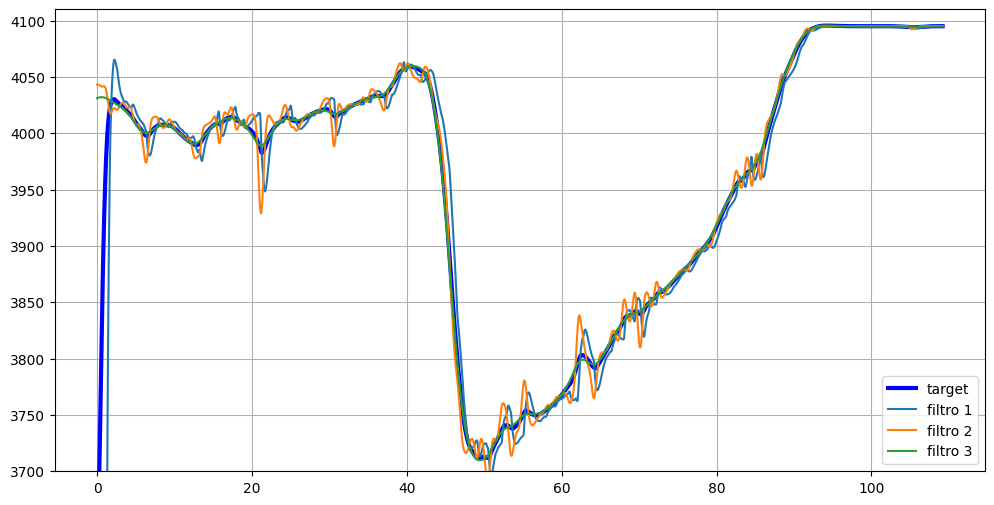

In [130]:
xData = df.drop(columns=['time', 'target', 'data'])
yData = df.target.values
display(xData.head())

plt.figure(figsize=(12, 6))
plt.plot(df.time, yData, label='target', color='blue', linewidth=3)
plt.plot(df.time, bkp.laplace, label='filtro 1')
plt.plot(df.time, bkp.gaussian, label='filtro 2')
plt.plot(df.time, bkp.butter, label='filtro 3')
plt.legend(), plt.grid(), plt.ylim(3700, 4110)
plt.show()

### REGRESSÃO LINEAR

score: 1.000
[ 8.00000000e-01 -1.03528297e-13  3.72167575e-14  1.00000000e-01
 -6.49653942e-14  3.02396996e-14  1.00000000e-01  6.10067552e-14
 -3.68385877e-14] 4.547473508864641e-12


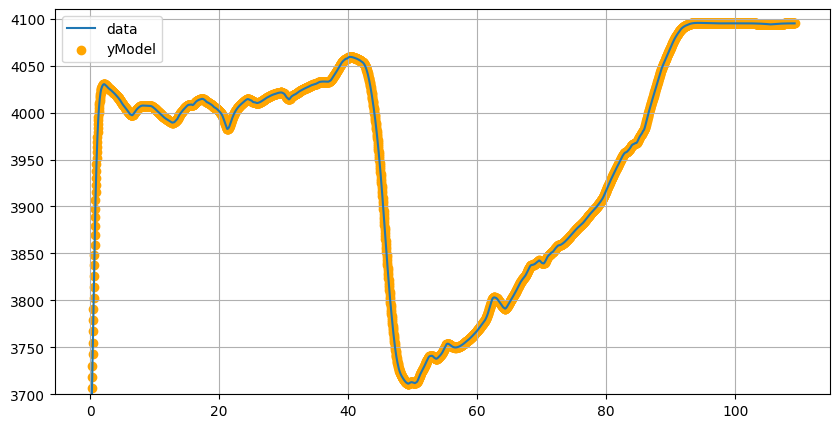

In [131]:
def linearRegression(xData, yData):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
    model = LinearRegression()
    model.fit(xTreino, yTreino)
    yModel = model.predict(xTeste)
    score = metrics.r2_score(yTeste, yModel)
    return model, score


model, score = linearRegression(xData, yData)
print(f'score: {score:.3f}')
print(model.coef_, model.intercept_)

yModel = model.predict(xData)
plt.figure(figsize=(10, 5))
plt.plot(df.time, yData, label='data')
plt.scatter(df.time, yModel, color='orange', label='yModel')
plt.legend(), plt.grid(), plt.ylim(3700, 4110)
plt.show()

### REGRESSÃO POLINOMIAL

score: 1.000


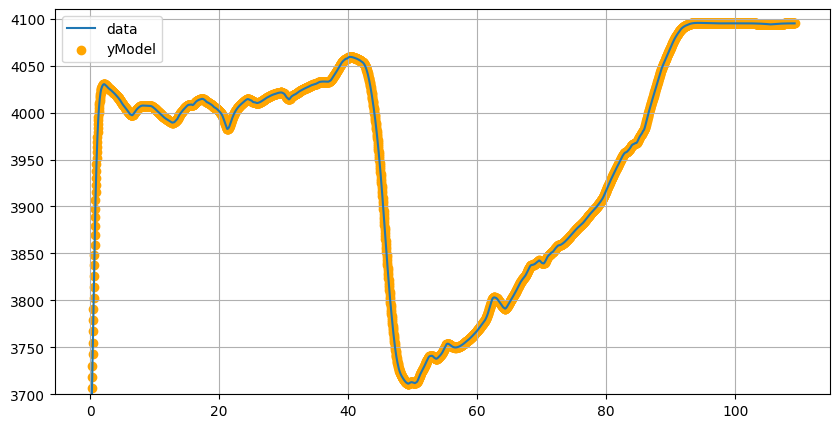

In [132]:
def polinomialRegression(xData, yData, degree=2):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(xTreino, yTreino)
    yModel = model.predict(xTeste)
    score = metrics.r2_score(yTeste, yModel)
    return model, score


model, score = polinomialRegression(xData, yData, degree=2)
print(f'score: {score:.3f}')

yModel = model.predict(xData)
plt.figure(figsize=(10, 5))
plt.plot(df.time, yData, label='data')
plt.scatter(df.time, yModel, color='orange', label='yModel')
plt.legend(), plt.grid(), plt.ylim(3700, 4110)
plt.show()

### ÁRVORE DE DECISÃO

score: 0.999


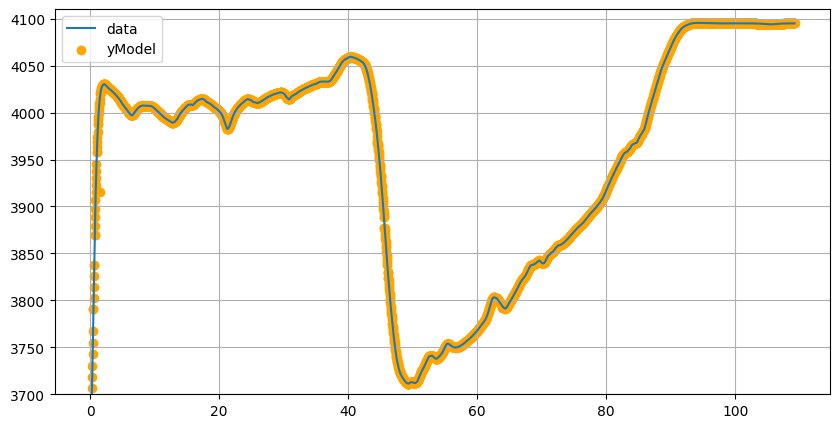

In [133]:
def decisionTreeRegression(xData, yData):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
    model = DecisionTreeRegressor()
    model.fit(xTreino, yTreino)
    yModel = model.predict(xTeste)
    score = metrics.r2_score(yTeste, yModel)
    return model, score


model, score = decisionTreeRegression(xData, yData)
print(f'score: {score:.3f}')

yModel = model.predict(xData)
plt.figure(figsize=(10, 5))
plt.plot(df.time, yData, label='data')
plt.scatter(df.time, yModel, color='orange', label='yModel')
plt.legend(), plt.grid(), plt.ylim(3700, 4110)
plt.show()

### RANDOM FOREST

score: 1.000


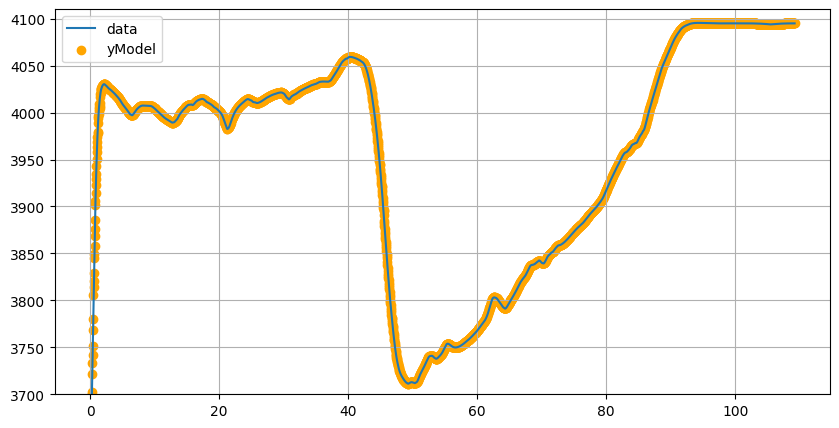

In [134]:
def randomForestRegression(xData, yData):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
    model = RandomForestRegressor()
    model.fit(xTreino, yTreino)
    yModel = model.predict(xTeste)
    score = metrics.r2_score(yTeste, yModel)
    return model, score


model, score = randomForestRegression(xData, yData)
print(f'score: {score:.3f}')

yModel = model.predict(xData)
plt.figure(figsize=(10, 5))
plt.plot(df.time, yData, label='data')
plt.scatter(df.time, yModel, color='orange', label='yModel')
plt.legend(), plt.grid(), plt.ylim(3700, 4110)
plt.show()

### SUPORTE VETORIAL PARA REGRESSÃO (SVR)

score: 0.978


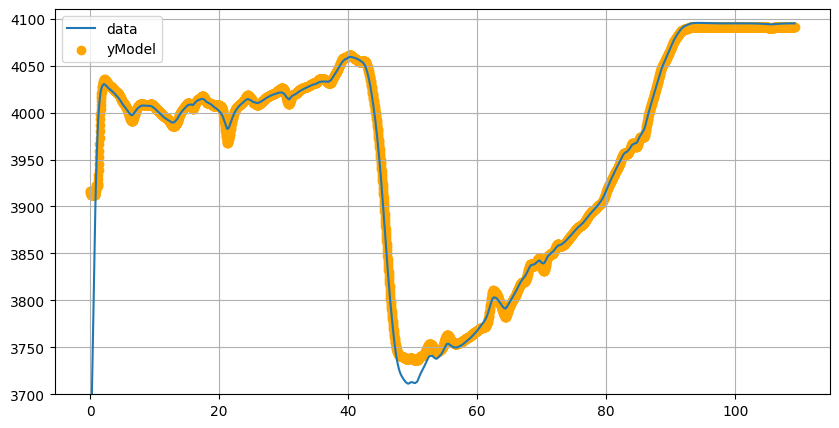

In [135]:
def supportVectorRegression(xData, yData):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
    model = SVR(kernel='rbf')  # kernel pode ser 'linear', 'poly', ou 'rbf'
    model.fit(xTreino, yTreino)
    yModel = model.predict(xTeste)
    score = metrics.r2_score(yTeste, yModel)
    return model, score


model, score = supportVectorRegression(xData, yData)
print(f'score: {score:.3f}')

yModel = model.predict(xData)
plt.figure(figsize=(10, 5))
plt.plot(df.time, yData, label='data')
plt.scatter(df.time, yModel, color='orange', label='yModel')
plt.legend(), plt.grid(), plt.ylim(3700, 4110)
plt.show()

### RIDGE REGRESSOR

score: 1.000


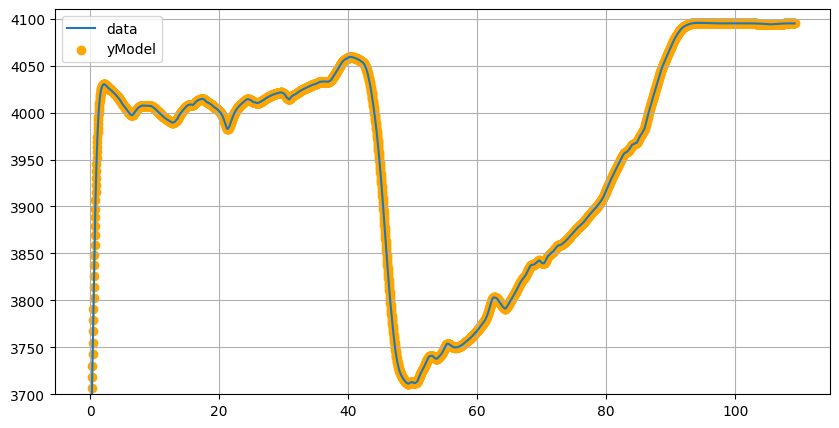

In [136]:
def ridgeRegression(xData, yData):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
    model = Ridge(alpha=1.0)  # Ajuste o parâmetro alpha para regularização
    model.fit(xTreino, yTreino)
    yModel = model.predict(xTeste)
    score = metrics.r2_score(yTeste, yModel)
    return model, score


model, score = ridgeRegression(xData, yData)
print(f'score: {score:.3f}')

yModel = model.predict(xData)
plt.figure(figsize=(10, 5))
plt.plot(df.time, yData, label='data')
plt.scatter(df.time, yModel, color='orange', label='yModel')
plt.legend(), plt.grid(), plt.ylim(3700, 4110)
plt.show()

### GRADIENT BOOSTER

score: 1.000


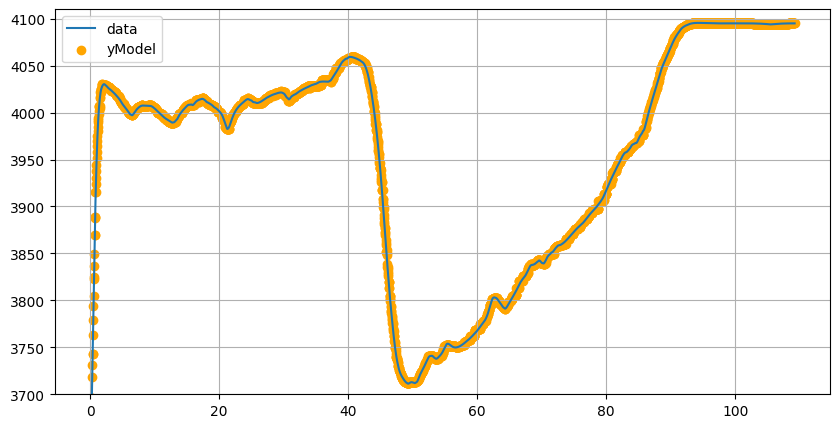

In [137]:
def gradientBoostingRegression(xData, yData):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
    model.fit(xTreino, yTreino)
    yModel = model.predict(xTeste)
    score = metrics.r2_score(yTeste, yModel)
    return model, score


model, score = gradientBoostingRegression(xData, yData)
print(f'score: {score:.3f}')

yModel = model.predict(xData)
plt.figure(figsize=(10, 5))
plt.plot(df.time, yData, label='data')
plt.scatter(df.time, yModel, color='orange', label='yModel')
plt.legend(), plt.grid(), plt.ylim(3700, 4110)
plt.show()

### K-NEAREST NEIGHBORS

score: 1.000


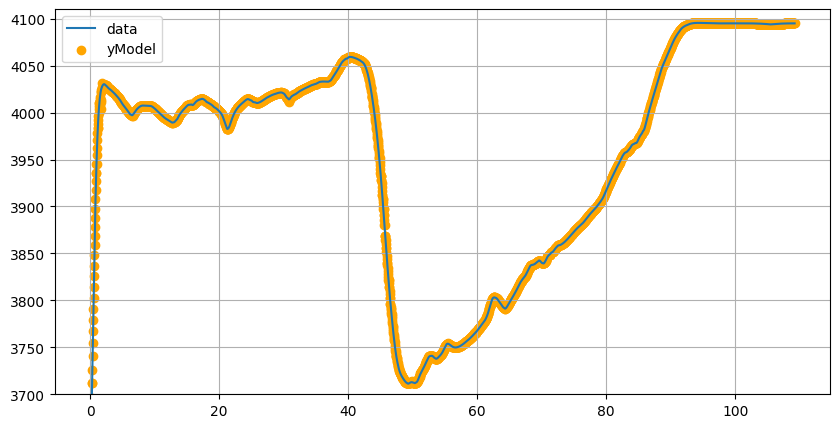

In [138]:
def knnRegression(xData, yData):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
    model = KNeighborsRegressor(n_neighbors=5)  # Ajuste n_neighbors conforme necessário
    model.fit(xTreino, yTreino)
    yModel = model.predict(xTeste)
    score = metrics.r2_score(yTeste, yModel)
    return model, score


model, score = knnRegression(xData, yData)
print(f'score: {score:.3f}')

yModel = model.predict(xData)
plt.figure(figsize=(10, 5))
plt.plot(df.time, yData, label='data')
plt.scatter(df.time, yModel, color='orange', label='yModel')
plt.legend(), plt.grid(), plt.ylim(3700, 4110)
plt.show()

# TESTANDO COM NOVOS DADOS

In [139]:
class StatesUpdater:
    states  = None
    initial = 0
    size    = 0

    def __init__(self, size, initial=0):
        self.initial = initial
        self.size    = size
        self.states  = initial * np.ones(size)
        
    def update(self, value):
        for i in range(self.size-1, 0, -1):
            self.states[i] = self.states[i-1]

        self.states[0] = value
        return self.states
    

states = StatesUpdater(3)
for i in range(1, 5): print(states.update(i))

[1. 0. 0.]
[2. 1. 0.]
[3. 2. 1.]
[4. 3. 2.]


In [140]:
df = pd.read_csv('DataBase.csv')
df.head()

,time,data,butter,laplace,gaussian,target
0,0.00,4034.0,4031.067104,5.012830,4043.200379,3629.675004
1,0.03,4034.0,4031.155260,24.472450,4043.194593,3631.690912
2,0.06,4034.0,4031.240059,61.661509,4043.182411,3635.476439
3,0.09,4045.0,4031.321277,114.404215,4043.162852,3640.813728
4,0.12,4045.0,4031.398696,180.707141,4043.134650,3647.503136


In [141]:
columns = xData.columns
columns

Index(['b[n-0]', 'b[n-1]', 'b[n-2]', 'l[n-0]', 'l[n-1]', 'l[n-2]', 'g[n-0]',
       'g[n-1]', 'g[n-2]'],
      dtype='object')

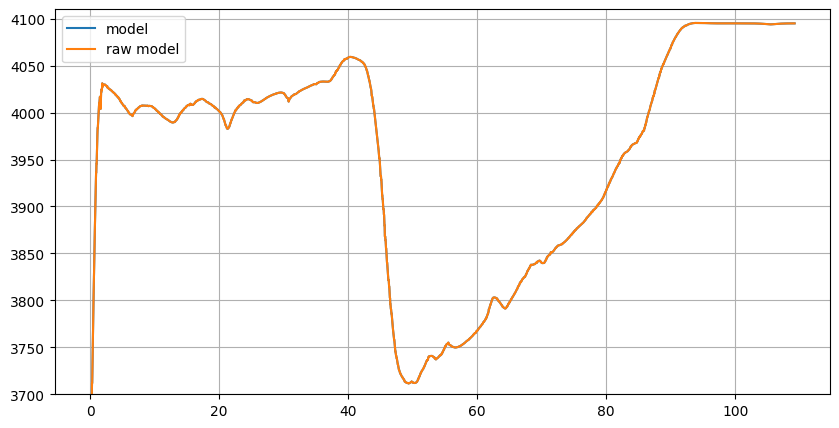

In [142]:
bstates = StatesUpdater(size)
lstates = StatesUpdater(size)
gstates = StatesUpdater(size)
yData   = []

for i, row in df.iterrows():
    butter, laplace, gaussian = row['butter'], row['laplace'], row['gaussian']
    xData  = list(bstates.update(butter)) + list(lstates.update(laplace)) + list(gstates.update(gaussian))
    xData  = pd.DataFrame([xData], columns=columns)
    yData.append(model.predict(xData)[0])


plt.figure(figsize=(10, 5))
plt.plot(df.time, yModel, label='model')
plt.plot(df.time, yData, label='raw model')
plt.legend(), plt.grid(), plt.ylim(3700, 4110)
plt.show()

In [143]:
metrics.r2_score(yData, yModel)

1.0